# MLSO Webinar — MapReduce


# MapReduce — Step-by-Step Explanation

MapReduce is a **programming model** for processing large datasets across distributed clusters.  
It works in two key phases — **Map** and **Reduce**, separated by a **Shuffle and Sort**.

Let's go step by step with multiple examples to understand this concept thoroughly.



## 🔹 Step 1: Input Splitting
Large input data is split into chunks (input splits).  
Each split is processed by a **mapper task** in parallel.

Example: If your input file has 1TB data and each split is 128MB, you get ~8,000 map tasks.



## 🔹 Step 2: Map Phase
Each mapper reads key-value pairs (like line number, text line) and emits **intermediate (key, value)** pairs.

You can think of it as a transformation function.



## 🔹 Step 3: Shuffle and Sort
The system automatically groups all intermediate pairs **by key** and sorts them so all values for the same key go to the same reducer.



## 🔹 Step 4: Reduce Phase
Reducers aggregate or summarize values for each unique key and produce final outputs.



#  Example 1 — Word Count (Classic)

The **goal**: Count frequency of each word in text data.
Explanation:
Each line is tokenized into words.
Mapper emits (word, 1) pairs.
Framework groups by word and reducer sums counts for each word.


In [17]:
from collections import defaultdict

text = '''Map Reduce is simple. Map Reduce is powerful.
This example shows how MapReduce counts words efficiently.'''

# Mapper Function
def mapper(line):
    for word in line.lower().split():
        yield (word.strip(".,!?"), 1)

# Collecting Mapper Output
mapped = []
for line in text.splitlines():
    mapped.extend(mapper(line))

WHITE = "\033[97m"
RESET = "\033[0m"

print(WHITE + "Mapper Output (Intermediate Key-Value Pairs):" + RESET)
print(WHITE + str(mapped) + RESET)

# Shuffle + Reduce
shuffled = defaultdict(list)
for k, v in mapped:
    shuffled[k].append(v)

# Reduce Phase
reduced = {k: sum(v) for k, v in shuffled.items()}
print(WHITE + "\nReducer Output (Final Word Counts):" + RESET)

for k, v in reduced.items():
    print(WHITE + f"{k}: {v}" + RESET)



Mapper Output (Intermediate Key-Value Pairs):
[('map', 1), ('reduce', 1), ('is', 1), ('simple', 1), ('map', 1), ('reduce', 1), ('is', 1), ('powerful', 1), ('this', 1), ('example', 1), ('shows', 1), ('how', 1), ('mapreduce', 1), ('counts', 1), ('words', 1), ('efficiently', 1)]

Reducer Output (Final Word Counts):
map: 2
reduce: 2
is: 2
simple: 1
powerful: 1
this: 1
example: 1
shows: 1
how: 1
mapreduce: 1
counts: 1
words: 1
efficiently: 1


**Explanation:**  

Mapper	Tokenizes words	Emits (word, 1) Each line is tokenized into words.  
Shuffle	Groups by word	{word: [1,1,1...]}
Reducer	Sums counts	{word: total} - counts for each word.



# Example 2 — Inverted Index
Goal: Find which documents contain each term.


In [12]:
docs = {
    "doc1": "hadoop map reduce framework",
    "doc2": "spark map reduce alternative",
    "doc3": "map reduce example in python"
}

mapped = []
for doc_id, text in docs.items():
    for word in text.lower().split():
        mapped.append((word, doc_id))

from collections import defaultdict
shuffled = defaultdict(set)
for w, doc in mapped:
    shuffled[w].add(doc)

WHITE = "\033[97m"
RESET = "\033[0m"

for k, v in shuffled.items():
    print(WHITE + f"{k}: {sorted(list(v))}" + RESET)

hadoop: ['doc1']
map: ['doc1', 'doc2', 'doc3']
reduce: ['doc1', 'doc2', 'doc3']
framework: ['doc1']
spark: ['doc2']
alternative: ['doc2']
example: ['doc3']
in: ['doc3']
python: ['doc3']


Mapper	Emits (word, docID)	Identify which document contains each word
Shuffle	Groups docIDs by word	Build inverted index structure
Reducer (implicit)	Removes duplicates using sets	Clean document list
Each word is associated with all document IDs where it appears — the foundation for **search engines** like Google and Elasticsearch.



# Example 3 — Average per Sensor
Goal: Compute average reading per sensor.


In [13]:
data = [
    ("sensor1", 30), ("sensor1", 40),
    ("sensor2", 50), ("sensor2", 60),
    ("sensor1", 50), ("sensor2", 70)
]

from collections import defaultdict
shuffled = defaultdict(list)
for s, val in data:
    shuffled[s].append(val)

averages = {s: sum(v)/len(v) for s, v in shuffled.items()}
for s, avg in averages.items():
    print(WHITE + f"{s}: {avg:.2f}" + RESET)

sensor1: 40.00
sensor2: 60.00


Example using **(sum, count)** pattern for combiners to reduce network load.



# Example 4 — Reduce-Side Join
Goal: Join two datasets (Orders and Users) on common key (user_id).


In [16]:
orders = [
    ("U1", "O101", 250),
    ("U2", "O102", 300),
    ("U1", "O103", 150)
]

users = [
    ("U1", "Alice", "Delhi"),
    ("U2", "Bob", "Mumbai")
]

from collections import defaultdict

mapped = []
for u, o, amt in orders:
    mapped.append((u, ("A", (o, amt))))
for u, name, city in users:
    mapped.append((u, ("B", (name, city))))

shuffled = defaultdict(list)
for k, v in mapped:
    shuffled[k].append(v)

for uid, vals in shuffled.items():
    user_info = [v for t, v in vals if t == "B"]
    orders_info = [v for t, v in vals if t == "A"]
    for (name, city) in user_info:
        for (order, amt) in orders_info:
            print(WHITE + f"{uid}	{order}	{amt}	{name}	{city}" + RESET)

U1	O101	250	Alice	Delhi
U1	O103	150	Alice	Delhi
U2	O102	300	Bob	Mumbai


Simulates a **reduce-side join** where all records with the same key meet in one reducer.


In [24]:
import math
docs = {
    "doc1": "map reduce example",
    "doc2": "map example python"
}

# TF
tf = {}
for doc, text in docs.items():
    words = text.split()
    total = len(words)
    for w in words:
        tf[(w, doc)] = tf.get((w, doc), 0) + 1

# DF
df = {}
for w, d in tf:
    df[w] = df.get(w, set())
    df[w].add(d)

# TF-IDF
tfidf = {}
for (w, d), count in tf.items():
    tfidf[(w, d)] = count * math.log(len(docs) / len(df[w]))

# TF-IDF display
print(WHITE + str(tfidf) + RESET)



{('map', 'doc1'): 0.0, ('reduce', 'doc1'): 0.6931471805599453, ('example', 'doc1'): 0.0, ('map', 'doc2'): 0.0, ('example', 'doc2'): 0.0, ('python', 'doc2'): 0.6931471805599453}



# Summary

| Use Case | Mapper Emits | Reducer Output |
|-----------|---------------|----------------|
| Word Count | (word, 1) | (word, total) |
| Inverted Index | (word, doc_id) | (word, [doc_ids]) |
| Average per Sensor | (sensor, value) | (sensor, avg) |
| Reduce-Side Join | (key, tagged_data) | joined records |


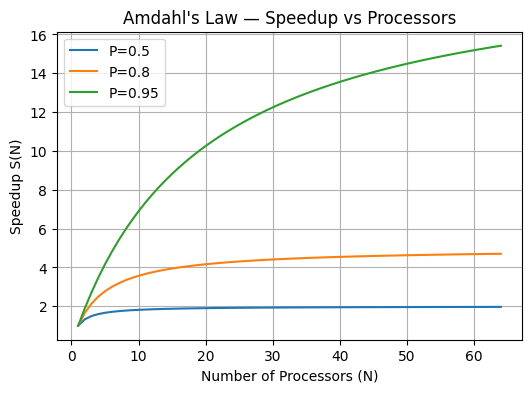

In [20]:
# Amdahl's Law Speedup Curve
import numpy as np
import matplotlib.pyplot as plt

def amdahl_speedup(P, N):
    return 1.0 / ((1.0 - P) + (P / N))

# Choose a few P values to compare
P_values = [0.5, 0.8, 0.95]
N = np.arange(1, 65)  # 1..64 processors

plt.figure(figsize=(6,4))
for P in P_values:
    S = amdahl_speedup(P, N)
    plt.plot(N, S, label=f'P={P}')

plt.title("Amdahl's Law — Speedup vs Processors")
plt.xlabel("Number of Processors (N)")
plt.ylabel("Speedup S(N)")
plt.grid(True)
plt.legend()
plt.show()

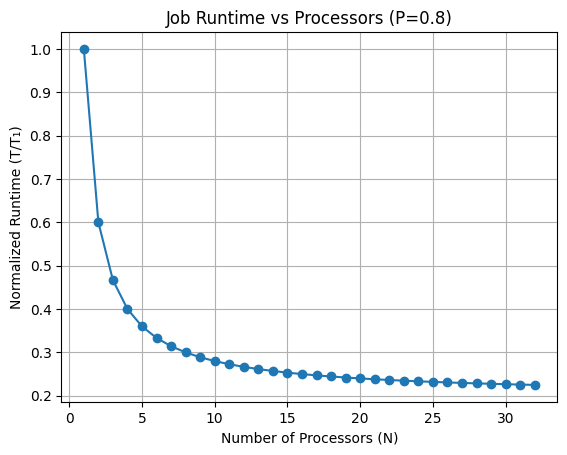

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_runtime(serial_time=1.0, P=0.8):
    N = np.arange(1, 33)
    total_time = serial_time * ((1 - P) + (P / N))
    plt.plot(N, total_time, marker='o')
    plt.title(f"Job Runtime vs Processors (P={P})")
    plt.xlabel("Number of Processors (N)")
    plt.ylabel("Normalized Runtime (T/T₁)")
    plt.grid()
    plt.show()

simulate_runtime(P=0.8)
